/tmp/ipython-input-3-1988267055.py:18: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  dados = pd.read_csv(url, delim_whitespace=True, names=colunas)


    Area  Perimetro  Compacidade  Comprimento_Nucleo  Largura_Nucleo  \
0  15.26      14.84       0.8710               5.763           3.312   
1  14.88      14.57       0.8811               5.554           3.333   
2  14.29      14.09       0.9050               5.291           3.337   
3  13.84      13.94       0.8955               5.324           3.379   
4  16.14      14.99       0.9034               5.658           3.562   

   Coef_Assimetria  Comprimento_Sulco  Classe  
0            2.221              5.220       1  
1            1.018              4.956       1  
2            2.699              4.825       1  
3            2.259              4.805       1  
4            1.355              5.175       1  
             Area   Perimetro  Compacidade  Comprimento_Nucleo  \
count  210.000000  210.000000   210.000000          210.000000   
mean    14.847524   14.559286     0.870999            5.628533   
std      2.909699    1.305959     0.023629            0.443063   
min     10.5900

<Figure size 1000x800 with 0 Axes>

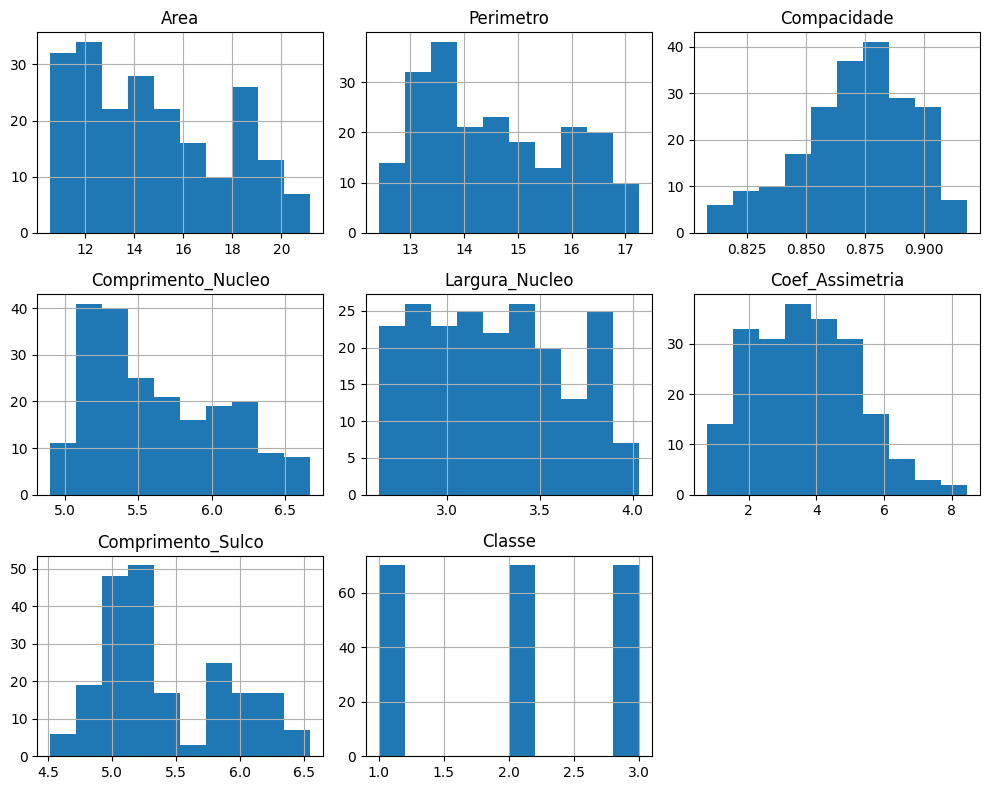

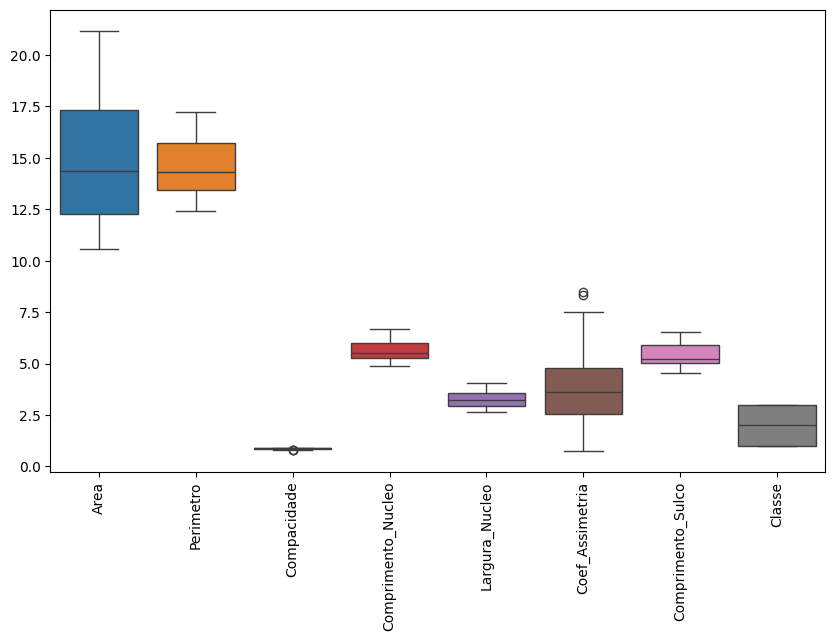

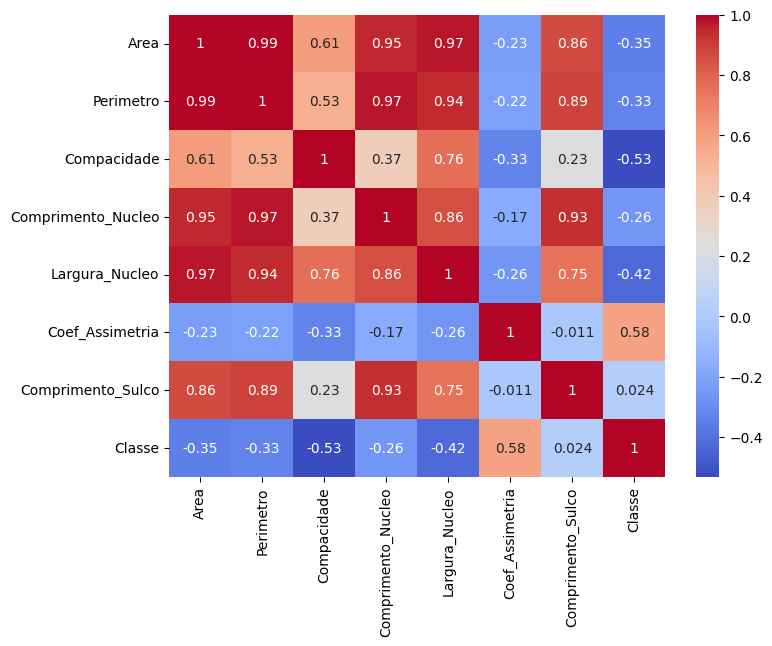

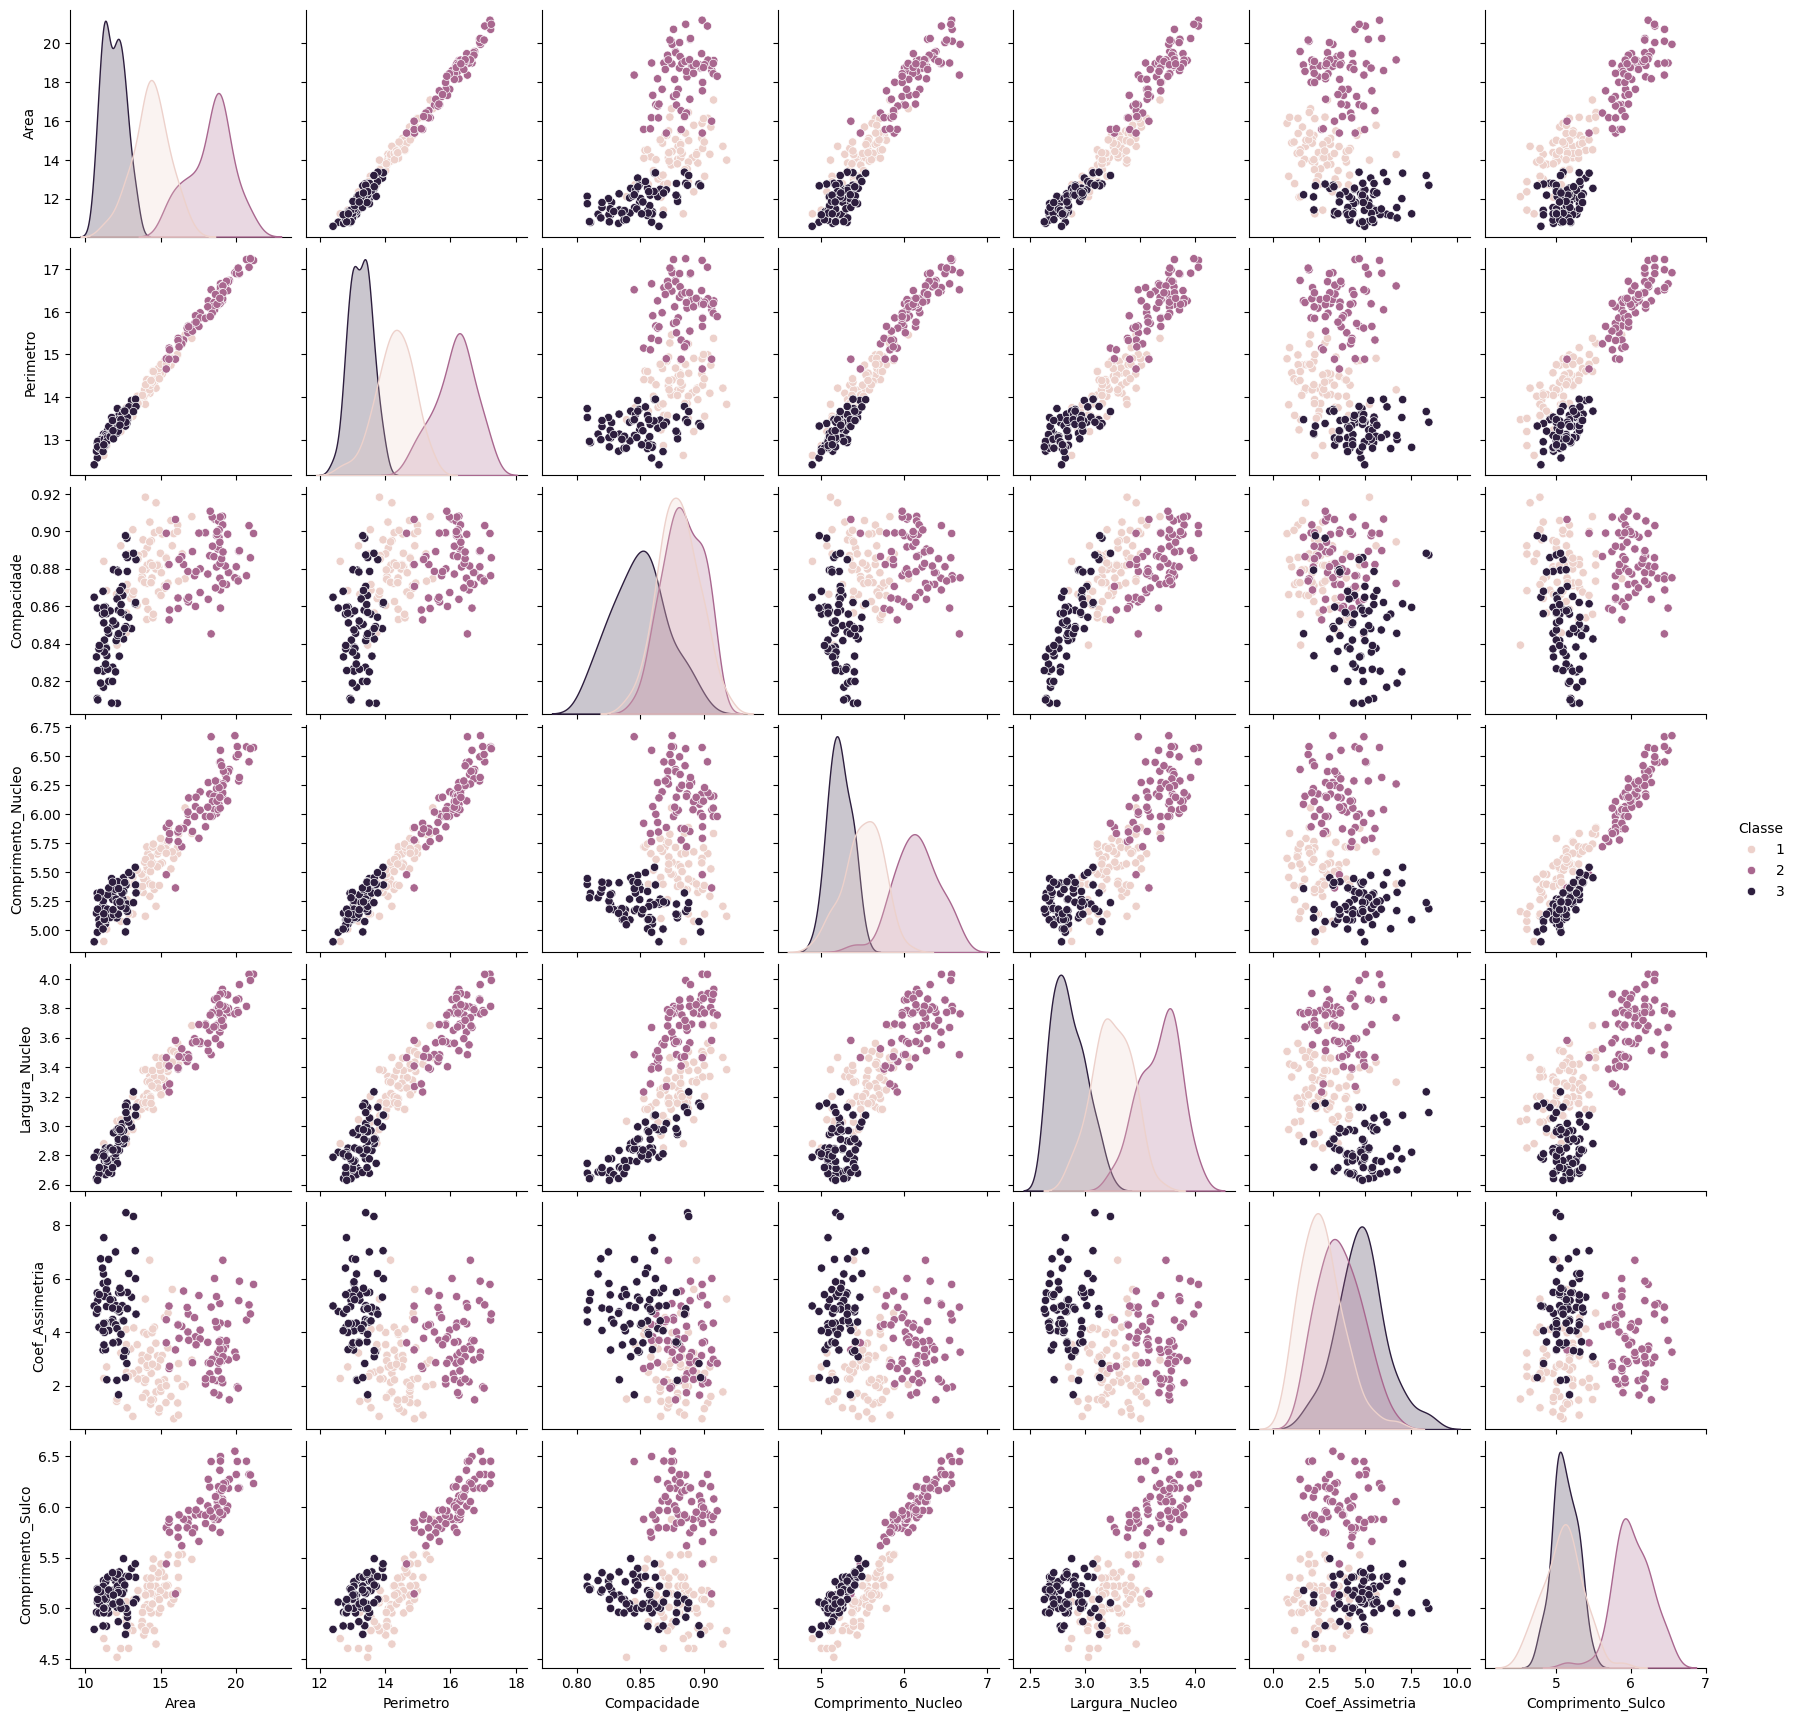

----- KNN -----
Acurácia: 0.873015873015873
              precision    recall  f1-score   support

           1       0.84      0.76      0.80        21
           2       0.90      0.90      0.90        21
           3       0.87      0.95      0.91        21

    accuracy                           0.87        63
   macro avg       0.87      0.87      0.87        63
weighted avg       0.87      0.87      0.87        63



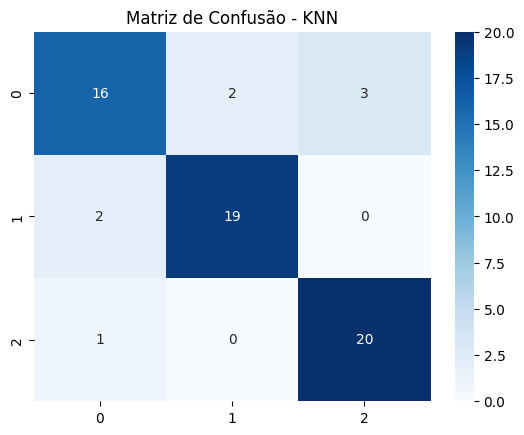

----- SVM -----
Acurácia: 0.873015873015873
              precision    recall  f1-score   support

           1       0.84      0.76      0.80        21
           2       0.90      0.90      0.90        21
           3       0.87      0.95      0.91        21

    accuracy                           0.87        63
   macro avg       0.87      0.87      0.87        63
weighted avg       0.87      0.87      0.87        63



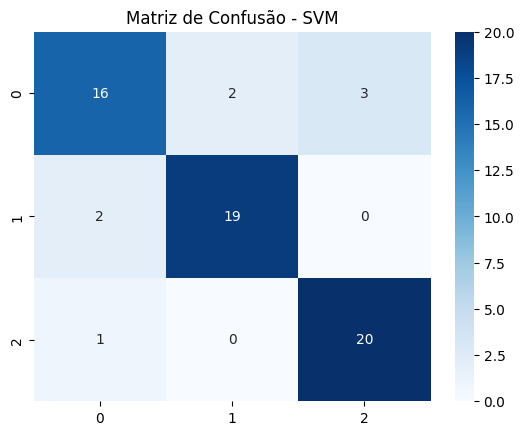

----- Random Forest -----
Acurácia: 0.9206349206349206
              precision    recall  f1-score   support

           1       0.94      0.81      0.87        21
           2       0.95      0.95      0.95        21
           3       0.88      1.00      0.93        21

    accuracy                           0.92        63
   macro avg       0.92      0.92      0.92        63
weighted avg       0.92      0.92      0.92        63



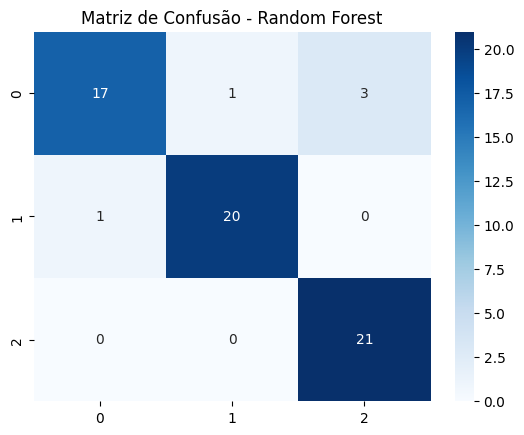

🔧 Melhores parâmetros SVM: {'C': 10, 'gamma': 'scale', 'kernel': 'linear'}
Acurácia SVM após otimização: 0.873015873015873
              precision    recall  f1-score   support

           1       0.81      0.81      0.81        21
           2       0.95      0.86      0.90        21
           3       0.87      0.95      0.91        21

    accuracy                           0.87        63
   macro avg       0.88      0.87      0.87        63
weighted avg       0.88      0.87      0.87        63



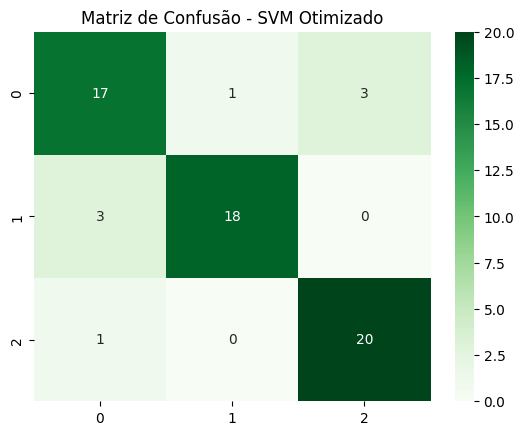

🔧 Melhores parâmetros KNN: {'n_neighbors': 16, 'p': 1, 'weights': 'distance'}
Acurácia KNN após otimização: 0.8571428571428571
              precision    recall  f1-score   support

           1       0.83      0.71      0.77        21
           2       0.90      0.90      0.90        21
           3       0.83      0.95      0.89        21

    accuracy                           0.86        63
   macro avg       0.86      0.86      0.85        63
weighted avg       0.86      0.86      0.85        63



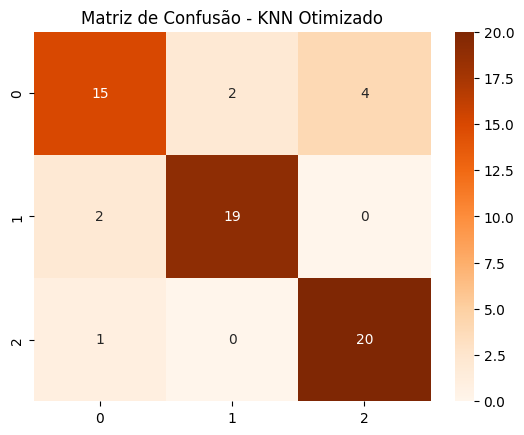

🔧 Melhores parâmetros Random Forest: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 50}
Acurácia Random Forest após otimização: 0.8888888888888888
              precision    recall  f1-score   support

           1       0.89      0.76      0.82        21
           2       0.95      0.95      0.95        21
           3       0.83      0.95      0.89        21

    accuracy                           0.89        63
   macro avg       0.89      0.89      0.89        63
weighted avg       0.89      0.89      0.89        63



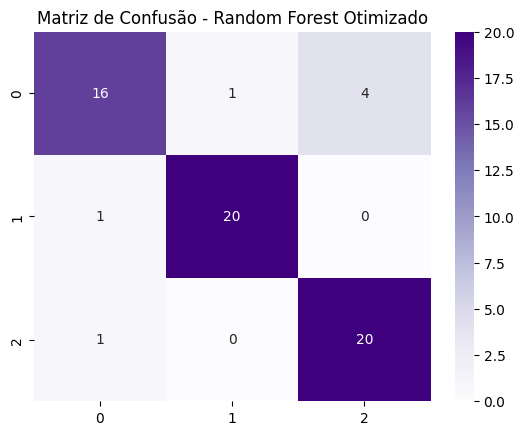

In [3]:
# importação das bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# carregamento do dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00236/seeds_dataset.txt"
colunas = ['Area', 'Perimetro', 'Compacidade', 'Comprimento_Nucleo',
           'Largura_Nucleo', 'Coef_Assimetria', 'Comprimento_Sulco', 'Classe']
dados = pd.read_csv(url, delim_whitespace=True, names=colunas)

# análise inicial dos dados
print(dados.head())
print(dados.describe())
print(dados.isnull().sum())

# visualização dos dados
plt.figure(figsize=(10,8))
dados.hist(figsize=(10,8))
plt.tight_layout()
plt.show()

plt.figure(figsize=(10,6))
sns.boxplot(data=dados)
plt.xticks(rotation=90)
plt.show()

plt.figure(figsize=(8,6))
sns.heatmap(dados.corr(), annot=True, cmap='coolwarm')
plt.show()

sns.pairplot(dados, hue='Classe')
plt.show()

# pré-processamento: separação de atributos e classe
atributos = dados.drop('Classe', axis=1)
classe = dados['Classe']

# padronização dos dados
escalador = StandardScaler()
atributos_escalados = escalador.fit_transform(atributos)

# divisão em treino e teste
atributos_treino, atributos_teste, classe_treino, classe_teste = train_test_split(
    atributos_escalados, classe, test_size=0.3, random_state=42, stratify=classe)

# criação dos modelos
modelos = {
    'KNN': KNeighborsClassifier(),
    'SVM': SVC(),
    'Random Forest': RandomForestClassifier(random_state=42)
}

# treinamento e Avaliação dos modelos
for nome, modelo in modelos.items():
    modelo.fit(atributos_treino, classe_treino)
    classe_predita = modelo.predict(atributos_teste)

    print(f'----- {nome} -----')
    print('Acurácia:', accuracy_score(classe_teste, classe_predita))
    print(classification_report(classe_teste, classe_predita))
    sns.heatmap(confusion_matrix(classe_teste, classe_predita), annot=True, fmt='d', cmap='Blues')
    plt.title(f'Matriz de Confusão - {nome}')
    plt.show()

# otimização de Hiperparâmetros (exemplo com SVM)
parametros_svm = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto']
}

grid_svm = GridSearchCV(SVC(), parametros_svm, cv=5)
grid_svm.fit(atributos_treino, classe_treino)

print('🔧 Melhores parâmetros SVM:', grid_svm.best_params_)

classe_predita_svm = grid_svm.predict(atributos_teste)
print('Acurácia SVM após otimização:', accuracy_score(classe_teste, classe_predita_svm))
print(classification_report(classe_teste, classe_predita_svm))

sns.heatmap(confusion_matrix(classe_teste, classe_predita_svm), annot=True, fmt='d', cmap='Greens')
plt.title('Matriz de Confusão - SVM Otimizado')
plt.show()

# otimização de KNN
parametros_knn = {
    'n_neighbors': list(range(1, 20)),
    'weights': ['uniform', 'distance'],
    'p': [1, 2]  # Manhattan ou Euclidiana
}

grid_knn = GridSearchCV(KNeighborsClassifier(), parametros_knn, cv=5)
grid_knn.fit(atributos_treino, classe_treino)

print('🔧 Melhores parâmetros KNN:', grid_knn.best_params_)

classe_predita_knn = grid_knn.predict(atributos_teste)
print('Acurácia KNN após otimização:', accuracy_score(classe_teste, classe_predita_knn))
print(classification_report(classe_teste, classe_predita_knn))

sns.heatmap(confusion_matrix(classe_teste, classe_predita_knn), annot=True, fmt='d', cmap='Oranges')
plt.title('Matriz de Confusão - KNN Otimizado')
plt.show()

# otimização de Random Forest
parametros_rf = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10]
}

grid_rf = GridSearchCV(RandomForestClassifier(random_state=42), parametros_rf, cv=5)
grid_rf.fit(atributos_treino, classe_treino)

print('🔧 Melhores parâmetros Random Forest:', grid_rf.best_params_)

classe_predita_rf = grid_rf.predict(atributos_teste)
print('Acurácia Random Forest após otimização:', accuracy_score(classe_teste, classe_predita_rf))
print(classification_report(classe_teste, classe_predita_rf))

sns.heatmap(confusion_matrix(classe_teste, classe_predita_rf), annot=True, fmt='d', cmap='Purples')
plt.title('Matriz de Confusão - Random Forest Otimizado')
plt.show()
